In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

#import keras
#import tensorflow

In [ ]:
print(tensorflow.__version__)
print(keras.__version__)

2.5.0
2.5.0


#  keras 기반의 regression

###  직선의 방정식

In [ ]:
# w = 2.1 ,   b = 0.13
X = np.array([[1],
              [2], 
              [3]])
y = np.array([[2.2], [4.4], [6.4]])

In [ ]:
model = Sequential()   # 출력값을 다층의 입력으로 넣어줌
model.add(  Dense(1)     )   # 출력층 추가
model.compile(loss='mse',  optimizer='sgd' )    # 최적화 방법 설정,  loss 함수,  경사하강법(gd)

In [ ]:
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 522ms/step - loss: 24.5993
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 19.4599
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 15.3973
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 12.1860
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 9.6476
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 7.6410
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 6.0549
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 4.8011
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 3.8099
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 3.0264


In [ ]:
w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]
w, b

(array([[1.1997187]], dtype=float32), array([0.5684647], dtype=float32))

In [ ]:
model.predict(X)   # y = wx + b

array([[1.7681835],
       [2.9679022],
       [4.1676207]], dtype=float32)

In [ ]:
model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
print(model.layers[0].get_weights())
print(model.predict(X))

[array([[2.0723975]], dtype=float32), array([0.1960804], dtype=float32)]
[[2.268478]
 [4.340875]
 [6.413273]]


In [ ]:
model = Sequential() 
model.add(  Dense(1)     ) 
model.compile(loss='mse',  optimizer='sgd' ) 
hist = model.fit(X, y, epochs=10000, verbose=0)

10000 [10.328632354736328, 8.169766426086426, 6.463273525238037, 5.114358425140381, 4.048088550567627, 3.205235719680786, 2.5389821529388428, 2.0123202800750732, 1.5959991216659546, 1.266894817352295, 1.0067330598831177, 0.8010650277137756, 0.6384726762771606, 0.5099290609359741, 0.40829896926879883, 0.3279433250427246, 0.264403373003006, 0.214155912399292, 0.174415722489357, 0.14298038184642792, 0.11811014264822006, 0.0984296202659607, 0.08285073935985565, 0.07051462680101395, 0.060741767287254333, 0.05299501493573189, 0.04684990644454956, 0.041971057653427124, 0.03809294477105141, 0.03500610962510109, 0.03254498168826103, 0.030578413978219032, 0.029002880677580833, 0.027736471965909004, 0.026714583858847618, 0.025886060670018196, 0.025210559368133545, 0.024656018242239952, 0.02419719099998474, 0.023814134299755096, 0.02349110133945942, 0.023215511813759804, 0.022977709770202637, 0.022769689559936523, 0.022585375234484673, 0.022419912740588188, 0.022269368171691895, 0.0221307892352342

array([[2.2333434],
       [4.333334 ],
       [6.433324 ]], dtype=float32)

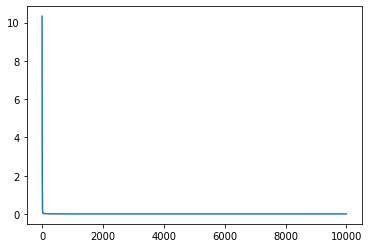

In [ ]:
loss = hist.history['loss']
print(len(loss), loss)
plt.plot(loss)
model.predict(X)  # y = np.array([[2.2], [4.4], [6.4]])

In [ ]:
print(model.layers[0].get_weights())

[array([[2.0999904]], dtype=float32), array([0.133353], dtype=float32)]


In [ ]:
model = Sequential() 
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 


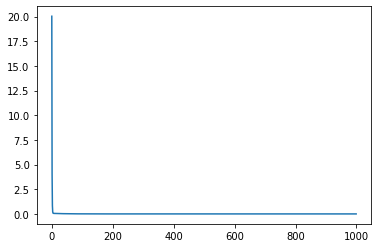

In [ ]:
hist = model.fit(X, y, epochs=1000, verbose=0)
plt.plot(hist.history['loss'])

In [ ]:
model.predict(X)

array([[2.2333338],
       [4.3333335],
       [6.433333 ]], dtype=float32)

### 주가모델링

In [ ]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
X = X / 7
y = Stock_Index_Price.reshape(-1, 1) / 2000

In [ ]:
model = Sequential() 

model.add(  Dense(1)     ) 

mysgd = optimizers.SGD(learning_rate=0.1)

model.compile(loss='mse',  optimizer=mysgd ) 
hist = model.fit(X, y, epochs=10000, verbose=0)

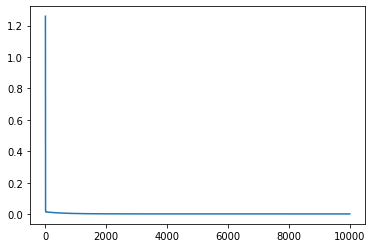

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
model.layers[0].get_weights()[0]

array([[-0.943803 ],
       [ 1.1453571]], dtype=float32)

In [ ]:
# 주가 예측,   실업률 5.3,    이자율 3.1   #   y = w1*x1 + w2*x2 + b

x_ = np.array([[5.3, 3.1]]) / 7
model.predict(x_) * 2000

array([[1534.293]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential() 
model.add(  Dense(5, input_shape=(4,)   )     ) 
model.add(  Dense(4)     ) 
model.add(  Dense(10)     ) 
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                50        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


# 다층 비선형 신경망

In [ ]:
X = np.array([[1],
              [2], 
              [3],
              [4],
              [5],
              [6],
              [7]]) / 7
              
y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1], [7.0], [8.6]])



In [ ]:

model = Sequential() 
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs=1000)
model.predict(X)

array([[2.0289125],
       [4.8030825],
       [5.76383  ],
       [5.684788 ],
       [5.760021 ],
       [6.7014313],
       [8.620479 ]], dtype=float32)

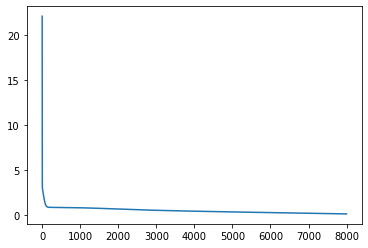

In [ ]:
model = Sequential() 
model.add(  Dense(5, activation='sigmoid')  ) 
model.add(  Dense(1)  ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
hist = model.fit(X, y, epochs=8000, verbose=0)
plt.plot(hist.history['loss'])
model.predict(X)
#[2.2], [4.4], [6.4], [5.7], [5.1]]

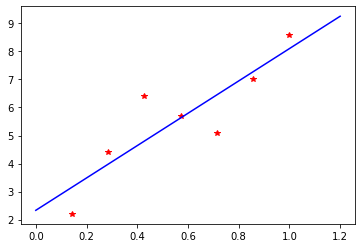

In [ ]:
plt.plot(X[:,0], y[:,0], '*r')

test  = np.linspace(0, 1.2, 50).reshape(-1,1)
p = model.predict(test)
plt.plot(test[:,0], p[:,0], 'b')

# 로지스틱 회귀

In [ ]:
X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])
#y = np.array([-2,-2,-2,-2,-2,    2,2,2,2])

model = Sequential() 
model.add(  Dense(1, activation='sigmoid')     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs=1000, verbose=0)
model.predict(X)

array([[0.15861863],
       [0.20812142],
       [0.16768953],
       [0.18706596],
       [0.49818408],
       [0.6586418 ],
       [0.7289898 ],
       [0.78947425],
       [0.83943295]], dtype=float32)

In [ ]:
model = Sequential() 
model.add(  Dense(1, activation='sigmoid')     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs=10000, verbose=0)
model.predict(X)

array([[0.00929672],
       [0.02071509],
       [0.01091987],
       [0.01505199],
       [0.3532491 ],
       [0.73512805],
       [0.86218905],
       [0.9337878 ],
       [0.9695037 ]], dtype=float32)

# 이진 분류에서 loss 함수

In [ ]:
p = 0.000001 # (  sig(wx+b)  
y = 1.0

print((p - y)**2)    # mse

0.9999980000009999


In [ ]:
p = 0.0000001 # sig(wx+b)  
y = 1.0
-   (    y * np.log(p+1e-7) + (1-y)*np.log(1-p+1e-7))  # binary  cross entropy

15.424948470398375

In [ ]:
p = np.array([0.1, 0.9, 0.2, 0.5])
y = np.array([0, 1, 1, 1])
cost = -  np.mean(    y * np.log(p+1e-7) + (1-y)*np.log(1-p+1e-7))  # binary  cross entropy
print(cost)

0.6283263005219083


In [ ]:
X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])
#y = np.array([-2,-2,-2,-2,-2,    2,2,2,2])

model = Sequential() 
model.add(  Dense(1, activation='sigmoid')     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',  optimizer = mysgd) 
model.fit(X, y, epochs=1000, verbose=0)
model.predict(X)

array([[0.05389681],
       [0.09009856],
       [0.05982119],
       [0.07353795],
       [0.47476143],
       [0.73197293],
       [0.82599485],
       [0.89190525],
       [0.9348199 ]], dtype=float32)

# softmax 정규화

In [ ]:
p =  np.array([1.2, 2.4, 4.8])
n_p = p / np.sum(p)
print(n_p)

[0.14285714 0.28571429 0.57142857]


In [ ]:
p =  np.exp(np.array([1.2, 2.4, 4.8]))
s_p = p / np.sum(p)
print(s_p)

[0.02443891 0.08114005 0.89442104]


In [ ]:
p =  np.array([-3, 1.2, 2.4, 4.8])
n_p = p / np.sum(p)
print(n_p)

[-0.55555556  0.22222222  0.44444444  0.88888889]


In [ ]:
p =  np.exp(np.array([-3, 1.2, 2.4, 4.8]))
s_p = p / np.sum(p)
print(s_p)

[3.66341331e-04 2.44299593e-02 8.11103213e-02 8.94093378e-01]


# 다중 클래스 에서의 loss 

In [ ]:
p = [0, 0, 0.999]
y = [1 , 0,   0]

error?   에러는 크게


p = [0.999, 0,    0]
y = [1 ,     0,   0]

error  ?  에러는 0에 가깝게

p = [0.7    0.2,    0.1]
y = [1 ,     0,      0]
error  ?  에러는 0보다  다소 큰값






p = 0.9
y = 1.0



In [ ]:
p = np.array([0.009, 0.2,    0.1])
y = np.array([1 ,     0,   0])

-y * np.log(p+1e-6),   -np.sum(y * np.log(p+1e-6))     # cross entropy

(array([ 4.7104196, -0.       , -0.       ]), 4.710419596707189)

# IRIS 데이터셋 분류

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data#[:, [0,1]]
y = iris.target
y_e = np.eye(3)[y]

print(X.shape)
#print(y_e)

(150, 4)


In [ ]:
#np.eye(3)[[0,1,2,2,1,1,0]]
#np.argmax(np.eye(3)[[0,1,2,2,1,1,0]], axis=1)

In [ ]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값

#mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist =  model.fit(X, y_e, epochs=2000, verbose=0)

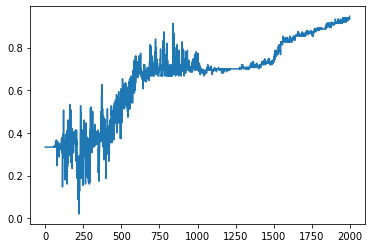

In [ ]:
#plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

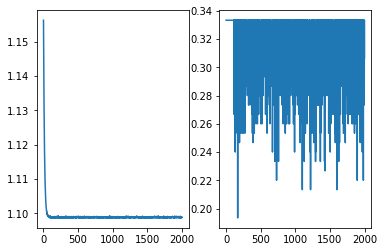

In [ ]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값

#mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist =  model.fit(X, y, epochs=2000, verbose=0)

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

In [ ]:
p = model.predict(X)
print(p.shape)
p = np.argmax(p, axis=1)
print(p)
np.mean(p == y) #  인식률
model.evaluate(X, y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
5/5 [==============================] - 1s 2ms/step - loss: 1.0986 - accuracy: 0.3333


[1.0986171960830688, 0.3333333432674408]